## 선형회귀

- 데이터를 명확하게 나타낼 수 있는 선을 최대한 적합하게 그려줌
- k최근접 알고리즘은 특수한 상황(타깃이 분포값보다 아주 크거나 아주 작거나 한 경우)에는
- 이웃의 숫자가 항상 똑같기 때문에 값이 크든 작든 똑같은 예상값이 나오므로 적합 X
- 이때 선형회귀를 이용

In [105]:
import pandas as pd
df = pd.read_csv('data/Fish.csv')

In [106]:
perch_df = df.loc[df['Species'] == 'Perch']

perch_length = perch_df[['Length2']] # 데이터 분리, 길이
perch_weight = perch_df[['Weight']] # 데이터 분리, 무게
# perch_length

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
train_input, test_input, train_target, test_target = \
train_test_split(perch_length, perch_weight) 

In [109]:
# 선형!! linear 회귀! regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression() # 선형회귀 인스턴스화

In [110]:
lr.fit(train_input, train_target)

LinearRegression()

In [111]:
lr.score(test_input, test_target)

0.9074947814140235

In [112]:
lr.predict([[100]]) # 예측하기 100g일 때 몸무게 예상

C:\Users\유승준\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[3122.93846064]])

In [113]:
lr.coef_ # a값, 기울기, 가중치 = 영향을 얼마나 줄까?

array([[38.13656676]])

In [114]:
lr.intercept_ # b값

array([-690.7182155])

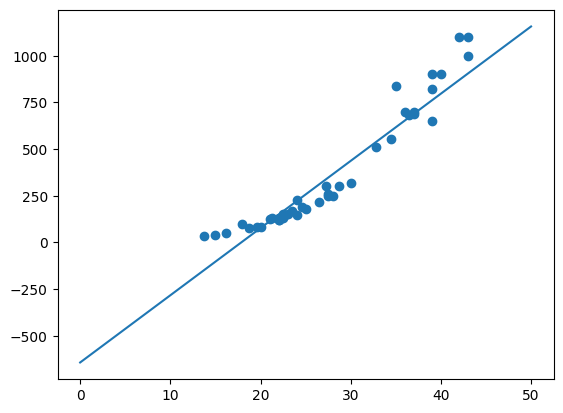

In [115]:
import matplotlib.pyplot as plt

plt.scatter(train_input, train_target)
plt.plot([0, 50], [0 * 36 - 643 , 50 * 36 - 643])
# plot은 선그래프, 시작점과 끝점을 지정해주면 시작부터 끝까지의 선을 그려줌
# 처음부터 그려진 선그래프를 그리는 것이 목적이 아니라
# 산점도의 경향을 따라 선의 기울기를 확인하려는 목적이기 때문에
# 시작점 범위는 큰 의미가 없음
# (선생님과 함께할 때는 15, 50임)

In [116]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9219787674643269
0.9074947814140235


In [117]:
lr.predict([[5]])

C:\Users\유승준\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[-500.03538169]])

## 다항회귀

In [118]:
train_input.head()

,Length2
77,18.0
115,37.0
87,22.0
99,25.0
106,28.0


In [119]:
# 제곱된 값 Length2_poly 칼럼 생성
train_input['Length2_poly'] = train_input['Length2'] ** 2
test_input['Length2_poly'] = test_input['Length2'] ** 2
train_input.head()

,Length2,Length2_poly
77,18.0,324.0
115,37.0,1369.0
87,22.0,484.0
99,25.0,625.0
106,28.0,784.0


In [120]:
lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [121]:
lr.score(test_input, test_target)

0.9688642710707376

In [129]:
lr.predict([[2, 4]])
# 2차원으로 바꾸면 음수값이 아니라 유효한 값이 나옴
# 다항회귀 학습 시 값을 2개(Length2, Length2_poly) 받았기 때문에
# 예측할 때에도 동일한 개수의 값을 주어야 함
# Length2 = 2 / Length2_poly = 2²

C:\Users\유승준\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[180.5350861]])

In [130]:
print(lr.coef_, lr.intercept_)

[[-30.82648219   1.17851396]] [237.47399463]
